# Business Problem:
The  business case is on the inventory management. Keeping
Inventory of spare in various service centre to the market demand is
always a challenge as most service centres spends significant amount
in spare parts inventory costs. In spite of this, availability of spare
parts is been one of the problem areas.


# PROJECT GOAL:
Creating Predictive model for inventory forecasting so that
service centre achieve JIT standards.

# Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import warnings
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plot
import pickle

# 1) Loading the data

In [2]:
data=pd.read_excel('data.xlsx')

In [3]:
data.head(2)

,Invoice Date,Job Card Date,Business Partner Name,Vehicle No.,Vehicle Model,Current KM Reading,INVOICE LINE TEXT
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL


# 2)Data Cleaning
 - Droping Nan values
 - Changing Column names

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28484 entries, 0 to 28483
Data columns (total 7 columns):
Invoice Date             28482 non-null datetime64[ns]
Job Card Date            28482 non-null datetime64[ns]
Business Partner Name    28484 non-null object
Vehicle No.              28484 non-null object
Vehicle Model            28482 non-null object
Current KM Reading       28482 non-null float64
INVOICE LINE TEXT        28449 non-null object
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 1.5+ MB


# Droping Nan values

In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28448 entries, 0 to 28481
Data columns (total 7 columns):
Invoice Date             28448 non-null datetime64[ns]
Job Card Date            28448 non-null datetime64[ns]
Business Partner Name    28448 non-null object
Vehicle No.              28448 non-null object
Vehicle Model            28448 non-null object
Current KM Reading       28448 non-null float64
INVOICE LINE TEXT        28448 non-null object
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 1.7+ MB


# Changing column names

In [7]:
new_data=data.rename(columns={'Invoice Date':'Invoice_Date',
                             'Job Card Date':'Job_Card_Date', 
                                  'Business Partner Name': 'Business_Partner_Name',
                             'Vehicle No.':'Vehicle_No.',
                             'Vehicle Model':'Vehicle_Model',
                             'Current KM Reading':'Current_KM_Reading',
                             'INVOICE LINE TEXT':'INVOICE_LINE_TEXT'})
data.columns = ['Invoice_Date','Job_Card_Date', 'Business_Partner_Name','Vehicle_No.','Vehicle_Model','Current_KM_Reading','INVOICE_LINE_TEXT']

In [8]:
new_data.head(10)

,Invoice_Date,Job_Card_Date,Business_Partner_Name,Vehicle_No.,Vehicle_Model,Current_KM_Reading,INVOICE_LINE_TEXT
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL
5,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CHAIN LUBRICATION
6,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,4 WAY SWITCH
7,2017-05-31,2017-05-31,pattXXXXXXXXXX,KA53EMXXXX,BAJAJ PLATINA,3717.0,ENGINE OIL
8,2017-05-31,2017-05-31,pattXXXXXXXXXX,KA53EMXXXX,BAJAJ PLATINA,3717.0,3M OIL
9,2017-05-31,2017-05-31,pattXXXXXXXXXX,KA53EMXXXX,BAJAJ PLATINA,3717.0,CHAIN LUBRICATION


# 3)Data visualizations

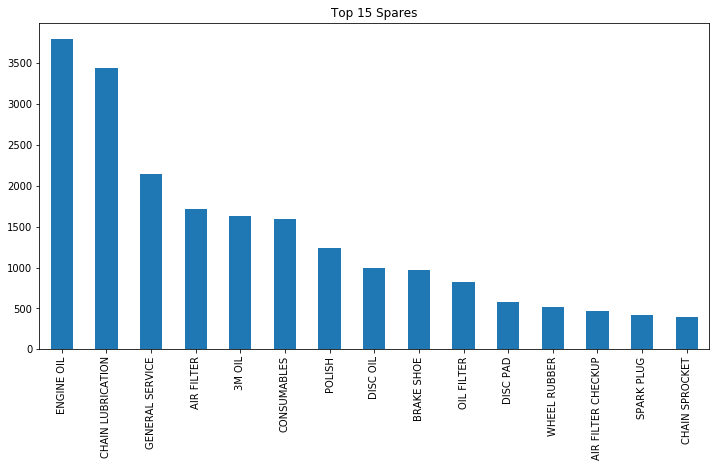

In [9]:
# Top 10 most Invoice_Line_Parts names
plot = data.INVOICE_LINE_TEXT.value_counts().nlargest(15).plot(kind='bar', title="Top 15 Spares", figsize=(12,6))

- Engine oil,Chain Lubrication,Air Filter,3M OIL,POLISH and so on.
- Even General Service and Consumables also have some parts in it so iam not droping

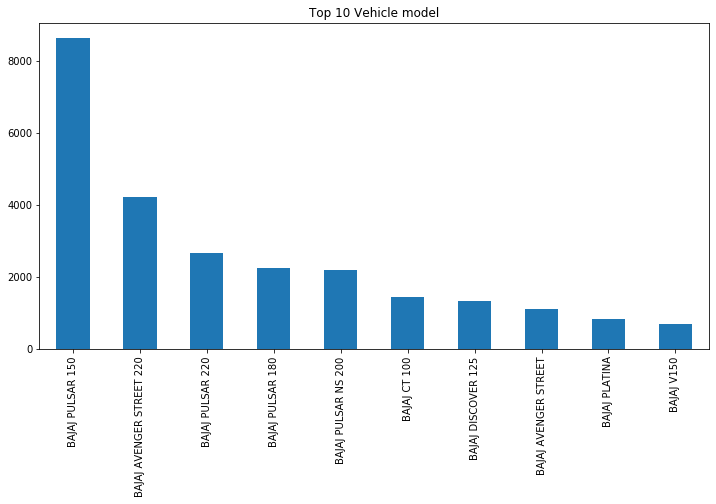

In [10]:
# Top 10 most Invoice_Line_Parts names
plot = data.Vehicle_Model.value_counts().nlargest(10).plot(kind='bar', title="Top 10 Vehicle model", figsize=(12,6))

- Bajaj Pulsar 150,Bajaj Avenger Street 220 and so on are top 10 Vehcile Model

In [11]:
# Counts of Invoice Line Text

In [12]:
new_data.INVOICE_LINE_TEXT.value_counts()

ENGINE OIL                                        3802
CHAIN LUBRICATION                                 3441
GENERAL SERVICE                                   2142
AIR FILTER                                        1715
3M OIL                                            1628
CONSUMABLES                                       1595
POLISH                                            1245
DISC OIL                                           991
BRAKE SHOE                                         965
OIL FILTER                                         821
DISC PAD                                           575
WHEEL RUBBER                                       521
AIR FILTER CHECKUP                                 467
SPARK PLUG                                         421
CHAIN SPROCKET                                     396
SPROCKET RUBBER                                    347
SPROCKET BEARING                                   314
CHAIN OVERHAUL                                     284
CLUTCH CAB

# Different Bike has different spare parts required depending upon that top 15 parts are taken down

In [13]:
sp=new_data.groupby(['Vehicle_Model', 'INVOICE_LINE_TEXT']).size().nlargest(15)
print(sp)

Vehicle_Model             INVOICE_LINE_TEXT
BAJAJ PULSAR 150          ENGINE OIL           1066
                          CHAIN LUBRICATION     970
                          GENERAL SERVICE       654
BAJAJ AVENGER STREET 220  ENGINE OIL            591
BAJAJ PULSAR 150          AIR FILTER            554
BAJAJ AVENGER STREET 220  CHAIN LUBRICATION     540
BAJAJ PULSAR 150          3M OIL                400
                          BRAKE SHOE            386
                          CONSUMABLES           386
BAJAJ AVENGER STREET 220  GENERAL SERVICE       379
BAJAJ PULSAR 220          ENGINE OIL            338
BAJAJ PULSAR 150          DISC OIL              322
                          POLISH                319
BAJAJ PULSAR 180          ENGINE OIL            303
BAJAJ AVENGER STREET 220  AIR FILTER            301
dtype: int64


In [14]:
sp.reset_index(name='size')

,Vehicle_Model,INVOICE_LINE_TEXT,size
0,BAJAJ PULSAR 150,ENGINE OIL,1066
1,BAJAJ PULSAR 150,CHAIN LUBRICATION,970
2,BAJAJ PULSAR 150,GENERAL SERVICE,654
3,BAJAJ AVENGER STREET 220,ENGINE OIL,591
4,BAJAJ PULSAR 150,AIR FILTER,554
5,BAJAJ AVENGER STREET 220,CHAIN LUBRICATION,540
6,BAJAJ PULSAR 150,3M OIL,400
7,BAJAJ PULSAR 150,BRAKE SHOE,386
8,BAJAJ PULSAR 150,CONSUMABLES,386
9,BAJAJ AVENGER STREET 220,GENERAL SERVICE,379


# Droping Columns

In [15]:
a=new_data.drop(['Job_Card_Date','Business_Partner_Name','Vehicle_No.','Current_KM_Reading'],axis=1)

In [16]:
n=a.groupby(['Vehicle_Model','INVOICE_LINE_TEXT']).size()
print(n)


Vehicle_Model         INVOICE_LINE_TEXT   
BAJAJ AVENGER STREET  3M OIL                   50
                      ACCELATOR CABLE           2
                      AIR FILTER               87
                      AIR FILTER CHECKUP       30
                      BALANCING GEAR            1
                      BATTERY                   2
                      BORE KIT                  1
                      BOTTLE COIL               1
                      BRAKE CABLE               1
                      BRAKE LIGHT SWITCH        2
                      BRAKE SHOE               66
                      BUSH KIT                  1
                      CALIPER RUBBER KIT        1
                      CAM SHAFT                 1
                      CHAIN ADJUSTER            1
                      CHAIN ADJUSTER PLATE      4
                      CHAIN LUBRICATION       155
                      CHAIN OVERHAUL           13
                      CHAIN SET                 5
       

# Grouping Bajaj Pulsar150- Engine oil
- Combination of grouping 'BAJAJ PULSAR 150','CHAIN LUBRICATION' with time series

In [17]:
n=a.groupby(['Vehicle_Model','INVOICE_LINE_TEXT'])
Engine_oil=n.get_group(('BAJAJ PULSAR 150','ENGINE OIL'))
Engine_oil

,Invoice_Date,Vehicle_Model,INVOICE_LINE_TEXT
14,2017-05-31,BAJAJ PULSAR 150,ENGINE OIL
50,2017-06-01,BAJAJ PULSAR 150,ENGINE OIL
58,2017-06-01,BAJAJ PULSAR 150,ENGINE OIL
100,2017-06-02,BAJAJ PULSAR 150,ENGINE OIL
117,2017-06-03,BAJAJ PULSAR 150,ENGINE OIL
129,2017-06-04,BAJAJ PULSAR 150,ENGINE OIL
161,2017-06-05,BAJAJ PULSAR 150,ENGINE OIL
207,2017-06-05,BAJAJ PULSAR 150,ENGINE OIL
218,2017-06-05,BAJAJ PULSAR 150,ENGINE OIL
239,2017-06-05,BAJAJ PULSAR 150,ENGINE OIL


In [18]:
Engine_oil.INVOICE_LINE_TEXT.value_counts()

ENGINE OIL    1066
Name: INVOICE_LINE_TEXT, dtype: int64

In [19]:
Engine_oil.head(10)

,Invoice_Date,Vehicle_Model,INVOICE_LINE_TEXT
14,2017-05-31,BAJAJ PULSAR 150,ENGINE OIL
50,2017-06-01,BAJAJ PULSAR 150,ENGINE OIL
58,2017-06-01,BAJAJ PULSAR 150,ENGINE OIL
100,2017-06-02,BAJAJ PULSAR 150,ENGINE OIL
117,2017-06-03,BAJAJ PULSAR 150,ENGINE OIL
129,2017-06-04,BAJAJ PULSAR 150,ENGINE OIL
161,2017-06-05,BAJAJ PULSAR 150,ENGINE OIL
207,2017-06-05,BAJAJ PULSAR 150,ENGINE OIL
218,2017-06-05,BAJAJ PULSAR 150,ENGINE OIL
239,2017-06-05,BAJAJ PULSAR 150,ENGINE OIL


# 4)Time Series

In [20]:
pp=Engine_oil.groupby(['Invoice_Date'])['Vehicle_Model', 'INVOICE_LINE_TEXT'].size()
pp

Invoice_Date
2017-05-31    1
2017-06-01    2
2017-06-02    1
2017-06-03    1
2017-06-04    1
2017-06-05    4
2017-06-06    2
2017-06-07    1
2017-06-09    2
2017-06-10    4
2017-06-12    2
2017-06-13    1
2017-06-14    3
2017-06-15    1
2017-06-16    4
2017-06-17    2
2017-06-18    1
2017-06-19    1
2017-06-21    3
2017-06-22    2
2017-06-23    1
2017-06-24    4
2017-06-25    2
2017-06-26    2
2017-06-27    1
2017-06-29    2
2017-06-30    2
2017-07-01    4
2017-07-03    2
2017-07-04    3
             ..
2018-12-06    1
2018-12-07    4
2018-12-08    3
2018-12-10    1
2018-12-11    2
2018-12-12    2
2018-12-13    3
2018-12-14    2
2018-12-15    1
2018-12-16    1
2018-12-17    1
2018-12-18    3
2018-12-19    3
2018-12-20    1
2018-12-21    2
2018-12-22    3
2018-12-23    2
2018-12-24    5
2018-12-25    2
2018-12-26    2
2018-12-27    5
2018-12-28    4
2018-12-29    2
2018-12-30    1
2018-12-31    3
2019-01-02    2
2019-01-03    1
2019-01-04    1
2019-01-05    6
2019-01-06    2
Length: 467

In [21]:
ps=pp.reset_index(name='total')
print(ps)

    Invoice_Date  total
0     2017-05-31      1
1     2017-06-01      2
2     2017-06-02      1
3     2017-06-03      1
4     2017-06-04      1
5     2017-06-05      4
6     2017-06-06      2
7     2017-06-07      1
8     2017-06-09      2
9     2017-06-10      4
10    2017-06-12      2
11    2017-06-13      1
12    2017-06-14      3
13    2017-06-15      1
14    2017-06-16      4
15    2017-06-17      2
16    2017-06-18      1
17    2017-06-19      1
18    2017-06-21      3
19    2017-06-22      2
20    2017-06-23      1
21    2017-06-24      4
22    2017-06-25      2
23    2017-06-26      2
24    2017-06-27      1
25    2017-06-29      2
26    2017-06-30      2
27    2017-07-01      4
28    2017-07-03      2
29    2017-07-04      3
..           ...    ...
437   2018-12-06      1
438   2018-12-07      4
439   2018-12-08      3
440   2018-12-10      1
441   2018-12-11      2
442   2018-12-12      2
443   2018-12-13      3
444   2018-12-14      2
445   2018-12-15      1
446   2018-12-16

In [22]:
pn=ps.set_index('Invoice_Date').resample('1W').sum()
pn

,total
Invoice_Date,
2017-06-04,6
2017-06-11,13
2017-06-18,14
2017-06-25,13
2017-07-02,11
2017-07-09,14
2017-07-16,12
2017-07-23,10
2017-07-30,13


In [23]:
pn=pn['total']
pn=pn.asfreq('D')
pn.index

DatetimeIndex(['2017-06-04', '2017-06-05', '2017-06-06', '2017-06-07',
               '2017-06-08', '2017-06-09', '2017-06-10', '2017-06-11',
               '2017-06-12', '2017-06-13',
               ...
               '2018-12-28', '2018-12-29', '2018-12-30', '2018-12-31',
               '2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06'],
              dtype='datetime64[ns]', name='Invoice_Date', length=582, freq='D')

In [24]:
pn.head(10)

Invoice_Date
2017-06-04     6.0
2017-06-05     NaN
2017-06-06     NaN
2017-06-07     NaN
2017-06-08     NaN
2017-06-09     NaN
2017-06-10     NaN
2017-06-11    13.0
2017-06-12     NaN
2017-06-13     NaN
Freq: D, Name: total, dtype: float64

# Weekly Sampling

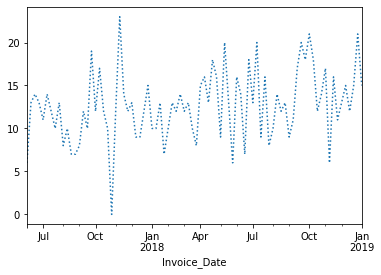

In [25]:
weekly=pn.resample('W').sum()
weekly.plot(style=[':','--','-'])

# Testing stationarity

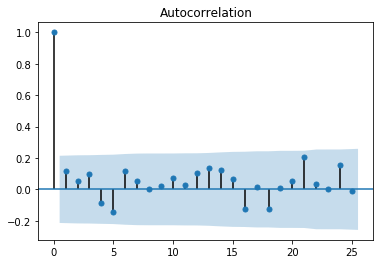

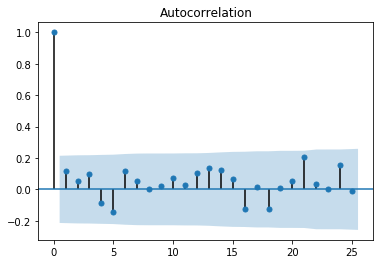

In [26]:
#Autocorrelation(p)
from  statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(weekly,lags=25)

#spiked decay shows data is stationary

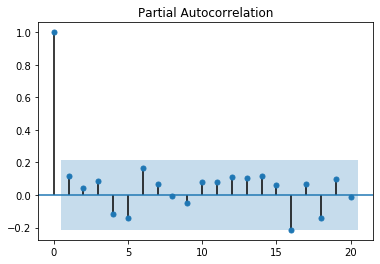

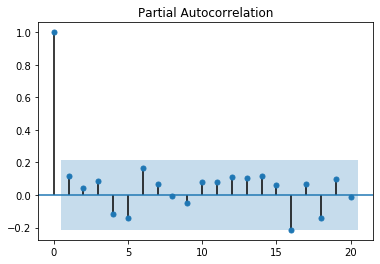

In [27]:
#partial auto correlation
plot_pacf(weekly,lags=20)

# Converting data to stationary format

Invoice_Date
2017-06-11    7.0
2017-06-18    1.0
2017-06-25   -1.0
2017-07-02   -2.0
2017-07-09    3.0
Freq: W-SUN, Name: total, dtype: float64


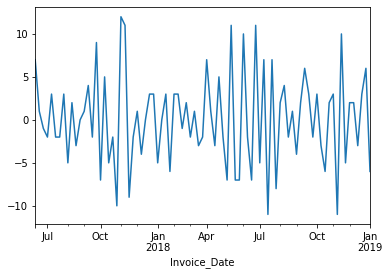

In [28]:
weekly_diff=weekly.diff(periods=1)
#integrated of order 1,denoted by d (for diff),one of the parameter
weekly_diff=weekly_diff[1:]
print(weekly_diff.head())
weekly_diff.plot()
#shows fluctationsaround mean values

In [29]:
weekly_diff.tail(10)

Invoice_Date
2018-11-04     3.0
2018-11-11   -11.0
2018-11-18    10.0
2018-11-25    -5.0
2018-12-02     2.0
2018-12-09     2.0
2018-12-16    -3.0
2018-12-23     3.0
2018-12-30     6.0
2019-01-06    -6.0
Freq: W-SUN, Name: total, dtype: float64

In [30]:
X=weekly_diff.values
X.size

83

# 4.1)Algorithm Autoregressive Model

In [31]:
X=weekly_diff.values
train=X[0:69]
test=X[69:]
predictions=[]

In [32]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar=AR(train)
model_ar_fit=model_ar.fit()

In [33]:
predictions=model_ar_fit.predict(start=69,end=83)

In [34]:
test

array([  3.,  -3.,  -6.,   2.,   3., -11.,  10.,  -5.,   2.,   2.,  -3.,
         3.,   6.,  -6.])

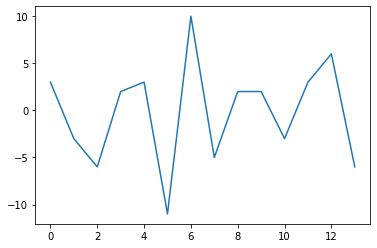

In [35]:
plt.plot(test)

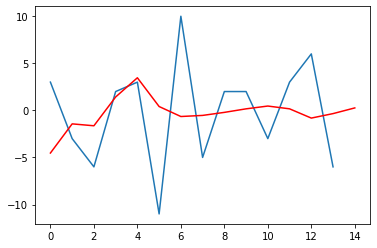

In [36]:
plt.plot(test)
plt.plot(predictions,color='red')

# 4.2 )Autoregressive integrated moving average

In [37]:
from statsmodels.tsa.arima_model import ARIMA

In [38]:
model_arima=ARIMA(train,order=(7,0,2))
model_arima_fit=model_arima.fit()
print(model_arima_fit.aic)

400.827809508031


G:\Data science\anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [39]:
predictions=model_arima_fit.forecast(steps=14)[0]
predictions

array([-2.94069154, -2.76472259, -0.47847148, -0.33058811,  2.40508227,
        0.33288874,  1.23464416, -0.94848381,  0.31499911, -1.31482353,
        0.66032717, -0.57859504,  0.96369445, -0.40199109])

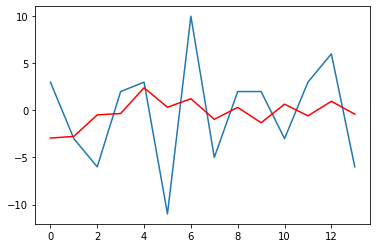

In [40]:
plt.plot(test)
plt.plot(predictions,color='red')

In [41]:
import itertools
p=d=q=range(2,5)
pdq=list(itertools.product(p,d,q))
pdq

[(2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 2, 2),
 (3, 2, 3),
 (3, 2, 4),
 (3, 3, 2),
 (3, 3, 3),
 (3, 3, 4),
 (3, 4, 2),
 (3, 4, 3),
 (3, 4, 4),
 (4, 2, 2),
 (4, 2, 3),
 (4, 2, 4),
 (4, 3, 2),
 (4, 3, 3),
 (4, 3, 4),
 (4, 4, 2),
 (4, 4, 3),
 (4, 4, 4)]

In [42]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima=ARIMA(train,order=param)
        model_arima_fit=model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

# 4.3) SARIMAX FORECAST

In [43]:
# Training the ARIMA model.
model = sm.tsa.statespace.SARIMAX(weekly_diff, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12), enforce_stationarity=False,
                                            enforce_invertibility=False)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4959      0.130     -3.827      0.000      -0.750      -0.242
ma.L1         -1.0000   3557.245     -0.000      1.000   -6973.071    6971.071
ar.S.L12      -0.5969      0.097     -6.165      0.000      -0.787      -0.407
sigma2        27.0075   9.61e+04      0.000      1.000   -1.88e+05    1.88e+05


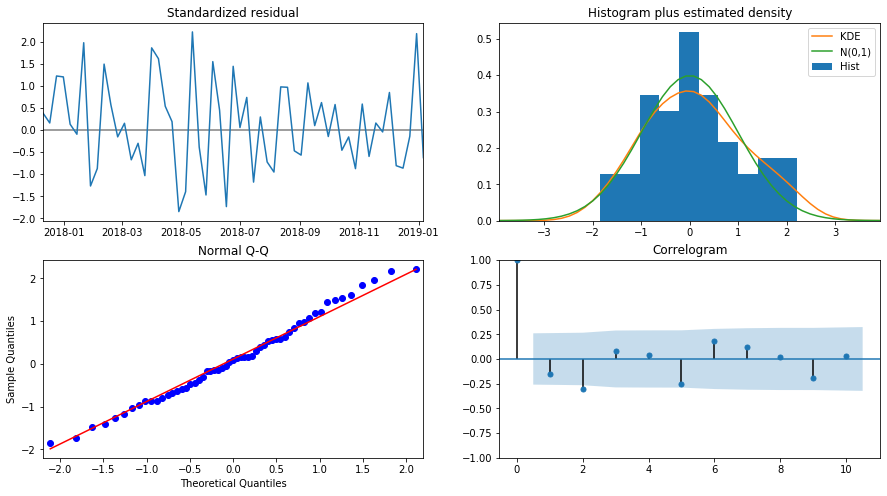

In [44]:
results.plot_diagnostics(figsize=(15, 8))
plt.show()

              lower total  upper total
Invoice_Date                          
2018-11-04     -10.365451    10.215599
2018-11-11     -18.143861     2.432961
2018-11-18      -1.104905    19.467855
2018-11-25     -15.047693     5.521164
2018-12-02     -12.728534     7.836568
2018-12-09      -4.039224    16.522264
2018-12-16      -8.747071    11.810935
2018-12-23      -6.536787    14.017861
2018-12-30     -15.699294     4.852116
2019-01-06     -12.989942     7.558342


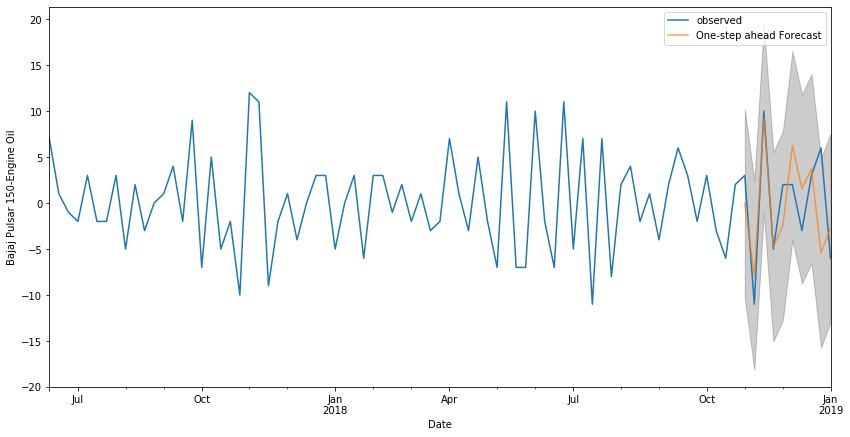

In [45]:
pred = results.get_prediction(start=pd.to_datetime('2018-11-04'), dynamic=False)
pred_ci = pred.conf_int()
print(pred_ci)
ax = weekly_diff['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Bajaj Pulsar 150-Engine Oil')
plt.legend()
plt.show()

In [46]:
y_predicted = pred.predicted_mean
y_true = weekly_diff['2018-11-04':]
mse = ((y_predicted - y_true)**2).mean()
print('Mean Square Error is:', round(mse, 4))

Mean Square Error is: 22.0198


In [47]:
print('Root Mean Square Error is:', np.sqrt(mse))

Root Mean Square Error is: 4.692523910726977


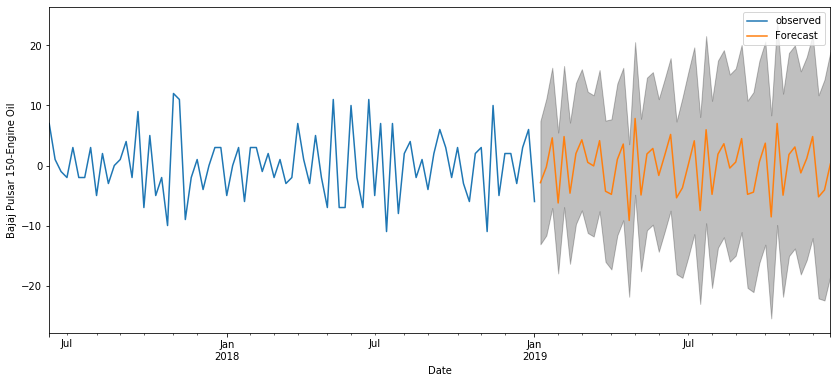

In [48]:
# Forecasting the future (out of sample) values.
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = weekly_diff.plot(label='observed', figsize=(14, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Bajaj Pulsar 150-Engine Oil')
plt.legend()
plt.show()

- Bajaj Pulsar 150-Engine Oil is forecasting 1 year 
BAJAJ PULSAR 150     -     ENGINE OIL           
BAJAJ PULSAR 150     -      CHAIN LUBRICATION     
BAJAJ PULSAR 150     -     GENERAL SERVICE       
BAJAJ AVENGER STREET 220  - ENGINE OIL            
BAJAJ PULSAR 150    -      AIR FILTER  
Forecasting of 1 year can be made.

# Combination of grouping 'BAJAJ PULSAR 150','CHAIN LUBRICATION' with time series

In [122]:
m=a.groupby(['Vehicle_Model','INVOICE_LINE_TEXT'])
Chain_Lub=m.get_group(('BAJAJ PULSAR 150','CHAIN LUBRICATION'))
Chain_Lub

,Invoice_Date,Vehicle_Model,INVOICE_LINE_TEXT
16,2017-05-31,BAJAJ PULSAR 150,CHAIN LUBRICATION
52,2017-06-01,BAJAJ PULSAR 150,CHAIN LUBRICATION
57,2017-06-01,BAJAJ PULSAR 150,CHAIN LUBRICATION
101,2017-06-02,BAJAJ PULSAR 150,CHAIN LUBRICATION
116,2017-06-03,BAJAJ PULSAR 150,CHAIN LUBRICATION
131,2017-06-04,BAJAJ PULSAR 150,CHAIN LUBRICATION
163,2017-06-05,BAJAJ PULSAR 150,CHAIN LUBRICATION
203,2017-06-05,BAJAJ PULSAR 150,CHAIN LUBRICATION
220,2017-06-05,BAJAJ PULSAR 150,CHAIN LUBRICATION
237,2017-06-05,BAJAJ PULSAR 150,CHAIN LUBRICATION


In [123]:
Lub=Chain_Lub.groupby(['Invoice_Date'])['Vehicle_Model', 'INVOICE_LINE_TEXT'].size()
Lub

Invoice_Date
2017-05-31    1
2017-06-01    2
2017-06-02    1
2017-06-03    1
2017-06-04    1
2017-06-05    4
2017-06-06    2
2017-06-07    1
2017-06-09    2
2017-06-10    2
2017-06-12    2
2017-06-13    2
2017-06-14    3
2017-06-15    2
2017-06-16    4
2017-06-17    2
2017-06-18    1
2017-06-19    1
2017-06-21    3
2017-06-22    2
2017-06-23    1
2017-06-24    4
2017-06-25    2
2017-06-26    2
2017-06-27    1
2017-06-29    2
2017-06-30    2
2017-07-01    4
2017-07-03    2
2017-07-04    3
             ..
2018-12-04    3
2018-12-05    2
2018-12-07    4
2018-12-08    3
2018-12-10    1
2018-12-11    1
2018-12-12    2
2018-12-13    3
2018-12-14    2
2018-12-15    2
2018-12-16    1
2018-12-17    1
2018-12-18    3
2018-12-19    2
2018-12-20    1
2018-12-21    2
2018-12-22    2
2018-12-23    2
2018-12-24    5
2018-12-25    2
2018-12-26    2
2018-12-27    4
2018-12-28    4
2018-12-29    2
2018-12-31    2
2019-01-02    4
2019-01-03    1
2019-01-04    1
2019-01-05    5
2019-01-06    2
Length: 449

In [124]:
Chain=Lub.reset_index(name='total')
print(Chain)

    Invoice_Date  total
0     2017-05-31      1
1     2017-06-01      2
2     2017-06-02      1
3     2017-06-03      1
4     2017-06-04      1
5     2017-06-05      4
6     2017-06-06      2
7     2017-06-07      1
8     2017-06-09      2
9     2017-06-10      2
10    2017-06-12      2
11    2017-06-13      2
12    2017-06-14      3
13    2017-06-15      2
14    2017-06-16      4
15    2017-06-17      2
16    2017-06-18      1
17    2017-06-19      1
18    2017-06-21      3
19    2017-06-22      2
20    2017-06-23      1
21    2017-06-24      4
22    2017-06-25      2
23    2017-06-26      2
24    2017-06-27      1
25    2017-06-29      2
26    2017-06-30      2
27    2017-07-01      4
28    2017-07-03      2
29    2017-07-04      3
..           ...    ...
419   2018-12-04      3
420   2018-12-05      2
421   2018-12-07      4
422   2018-12-08      3
423   2018-12-10      1
424   2018-12-11      1
425   2018-12-12      2
426   2018-12-13      3
427   2018-12-14      2
428   2018-12-15

In [125]:
CHAIN=Chain.set_index('Invoice_Date').resample('1W').sum()
CHAIN

,total
Invoice_Date,
2017-06-04,6
2017-06-11,11
2017-06-18,16
2017-06-25,13
2017-07-02,11
2017-07-09,13
2017-07-16,11
2017-07-23,10
2017-07-30,11


In [126]:
CHAIN=CHAIN['total']
CHAIN=CHAIN.asfreq('D')
CHAIN.index

DatetimeIndex(['2017-06-04', '2017-06-05', '2017-06-06', '2017-06-07',
               '2017-06-08', '2017-06-09', '2017-06-10', '2017-06-11',
               '2017-06-12', '2017-06-13',
               ...
               '2018-12-28', '2018-12-29', '2018-12-30', '2018-12-31',
               '2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06'],
              dtype='datetime64[ns]', name='Invoice_Date', length=582, freq='D')

In [127]:
CHAIN.head(10)

Invoice_Date
2017-06-04     6.0
2017-06-05     NaN
2017-06-06     NaN
2017-06-07     NaN
2017-06-08     NaN
2017-06-09     NaN
2017-06-10     NaN
2017-06-11    11.0
2017-06-12     NaN
2017-06-13     NaN
Freq: D, Name: total, dtype: float64

In [139]:
# Weekly Sampling

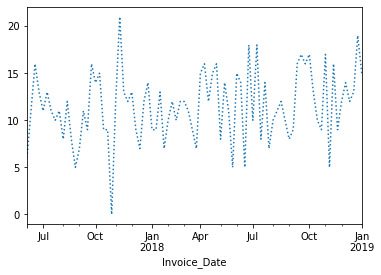

In [128]:
weekly=CHAIN.resample('W').sum()
weekly.plot(style=[':','--','-'])

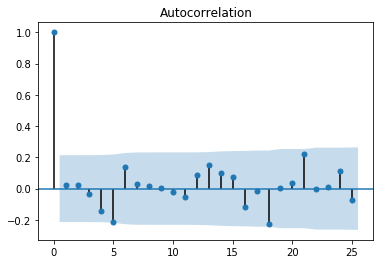

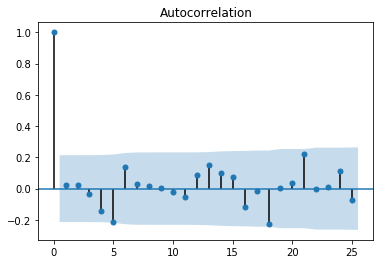

In [129]:
#Autocorrelation(p)
from  statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(weekly,lags=25)

#spiked decay shows data is stationary

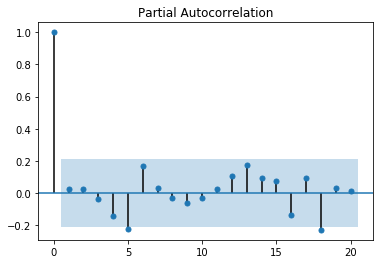

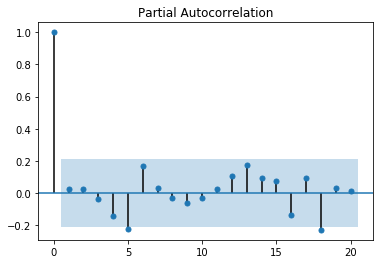

In [130]:
#partial auto correlation
plot_pacf(weekly,lags=20)

Invoice_Date
2017-06-11    5.0
2017-06-18    5.0
2017-06-25   -3.0
2017-07-02   -2.0
2017-07-09    2.0
Freq: W-SUN, Name: total, dtype: float64


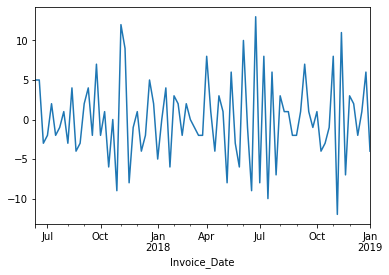

In [131]:
weekly_DIFF=weekly.diff(periods=1)
#integrated of order 1,denoted by d (for diff),one of the parameter
weekly_DIFF=weekly_DIFF[1:]
print(weekly_DIFF.head())
weekly_DIFF.plot()
#shows fluctationsaround mean values

In [132]:
X=weekly_diff.values
X.size

83

# SARIMAX FORECAST

In [133]:
# Training the ARIMA model.
model = sm.tsa.statespace.SARIMAX(weekly_DIFF, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12), enforce_stationarity=False,
                                            enforce_invertibility=False)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5809      0.121     -4.803      0.000      -0.818      -0.344
ma.L1         -1.0000   1226.680     -0.001      0.999   -2405.249    2403.249
ar.S.L12      -0.5835      0.115     -5.074      0.000      -0.809      -0.358
sigma2        25.3734   3.11e+04      0.001      0.999    -6.1e+04     6.1e+04


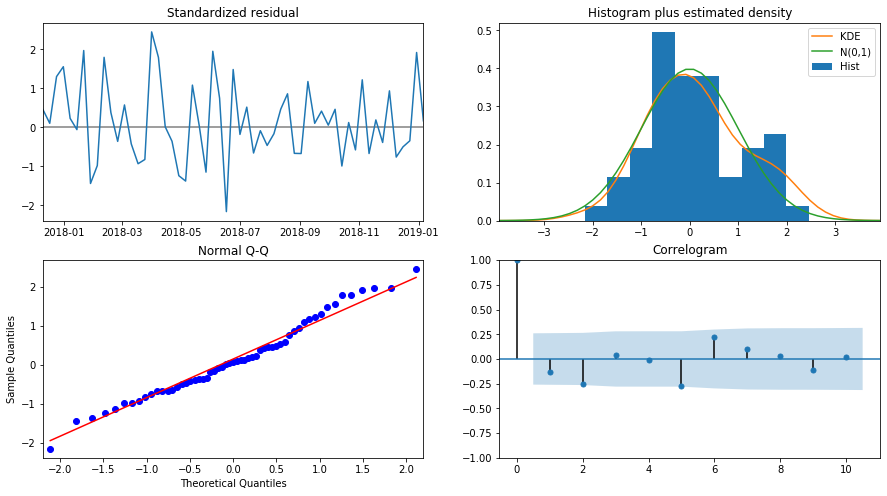

In [134]:
results.plot_diagnostics(figsize=(15, 8))
plt.show()

              lower total  upper total
Invoice_Date                          
2018-11-04      -8.193881    11.755138
2018-11-11     -18.578274     1.366635
2018-11-18       0.043347    19.984309
2018-11-25     -15.016867     4.920300
2018-12-02     -11.743538     8.189980
2018-12-09      -4.110527    15.819477
2018-12-16      -9.443236    10.483384
2018-12-23      -7.230024    12.693334
2018-12-30     -13.732701     6.187509
2019-01-06     -14.828415     5.088758


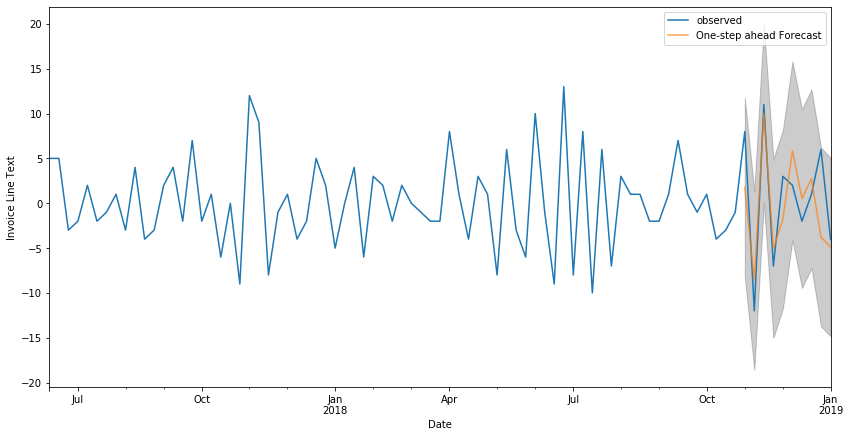

In [135]:
pred = results.get_prediction(start=pd.to_datetime('2018-11-04'), dynamic=False)
pred_ci = pred.conf_int()
print(pred_ci)
ax = weekly_DIFF['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Invoice Line Text')
plt.legend()
plt.show()

In [136]:
y_predicted = pred.predicted_mean
y_true = weekly_DIFF['2018-11-04':]
mse = ((y_predicted - y_true)**2).mean()
print('Mean Square Error is:', round(mse, 4))

Mean Square Error is: 19.8267


In [137]:
print('Root Mean Square Error is:', np.sqrt(mse))

Root Mean Square Error is: 4.452718420905975


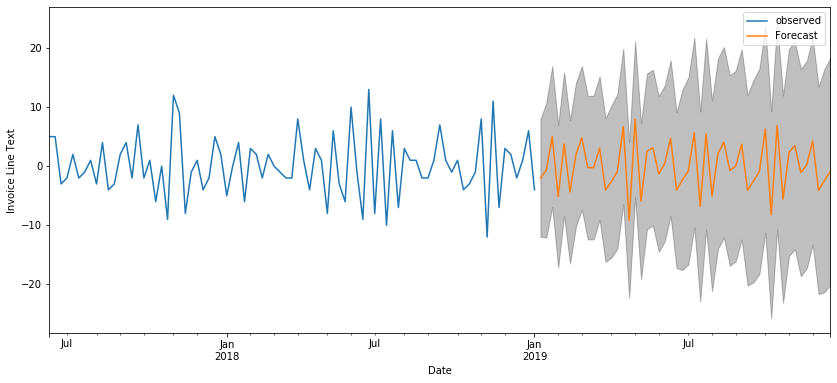

In [138]:
# Forecasting the future (out of sample) values.
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = weekly_DIFF.plot(label='observed', figsize=(14, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Invoice Line Text')
plt.legend()
plt.show()

# BAJAJ PULSAR 150 - CHAIN LUBRICATION is forecasted for 1 year
- BAJAJ PULSAR 150 - GENERAL SERVICE
- BAJAJ AVENGER STREET 220 - ENGINE OIL
- BAJAJ PULSAR 150 - AIR FILTER
- Forecasting of 1 Year can be made.